## Recommended resources
- [3Blue1Brown's Neural Network Series](https://www.youtube.com/watch?v=aircAruvnKk&list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi)

In [1]:
import torch
import torchvision
#install torchvision via anaconda prompt:
#  conda install -c pytorch torchvision 

C:\Users\burro\anaconda3\envs\torch\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## 1. Definition

A feed-forward neural network $f(\cdot \theta)$ is a **directed acyclic graph**, parametrized by $\theta$, that applies a series of transformation to an input $\mathbf{x} \in \mathbb{R}^d$, layer-wise, and without recursion, to
produce an output $y = f(\mathbf{x}, \theta) \in \mathbb{R}^s$ , as depicted in below.
<p align="center\">
<img src="layer_wise_fnn.png\" width="550" title="Layer computation in a feed-forward neural network">

Given a $K$ layer network -- here the input is not considered as a layer --, the $k$-th layer is characterized by a function
$f_k$ parametrized by $\theta_k$. 
In other words, 
$$f(\mathbf{x}, \theta) = f_K(\dots f_2(f_1(\mathbf{x}; \theta_1); \theta_2) \dots; \theta_K).$$
The $f_k$'s are of the form
$$f_k(\mathbf{z}_{k-1}; \theta_k) = \mathbf{z}_k = \sigma_k(\mathbf{q}_{k-1}) = \sigma_k(\mathbf{W}_k\mathbf{z}_{k-1} + \mathbf{b}_k),$$
where $\theta_k = \{\mathbf{W}_k, \mathbf{b}_k\}$, $\mathbf{W}_k \in \mathbb{R}^{h_k\times h_{k-1}}$ is known as the **weight
matrix**, $\mathbf{b}_k \in \mathbb{R}^{h_k}$ is the **bias vector**, $\mathbf{z}_k \in \mathbb{R}^{h_k}$ is the output
of the $k$-th layer, $h_k$ is the dimension (the number of neurons) of the $k$-th layer, $\sigma_k$ is point-wise operator 
known as **activation function** of the layer, and $\mathbf{q}_k$ is the **pre-activation vector**.


Typical **activation functions** include: 
- **tanh**: $x \mapsto \frac{\exp(2x) -1 }{\exp(2x) + 1}$,
- **sigmoid**: $x \mapsto \frac{1}{\exp(-x) + 1}$,
- **ReLU**:  $x \mapsto \max(0,x)$ (The Rectified Linear Unit ),
- **softmax**:  $\mathbf{x} \in \mathbb{R}^d  \mapsto [\dots, \frac{\exp(\mathbf{x}[i])}{\sum_{j=1}^d \exp(\mathbf{x}[j])}, \dots]$.


Given an output $\mathbf{z} \in \mathbb{R}^s$ and a ground-truth $\mathbf{y} \in \mathbb{R}^s$, commonly used **loss functions** are:
- **MSE**: $(\mathbf{z}, \mathbf{y}) \mapsto \|\mathbf{z} - \mathbf{y}\|_2^2$, (Mean Squared Error),
- **MAE**: $(\mathbf{z}, \mathbf{y}) \mapsto \|\mathbf{z} - \mathbf{y}\|_1$, (Mean Absolute Error),
- **CE**: $(\mathbf{z}, \mathbf{y}) \mapsto - \langle \mathbf{y}, \log\mathbf{z} \rangle = - \sum_i \mathbf{y}[i] \log \mathbf{z}[i] $, (Cross-entropy).

    
**Illustration of a FNN**
<p align="center\">
<img src="fnn_example.png\" width="450" title="Graphical view of a FNN">
</p> 

## 2. Back-propagation

### 2.1 Basic idea

Given a set of network parameter $\theta$, and a dataset $\mathcal{D} = \{\mathbf{x}_i \in \mathbb{R}^d, \mathbf{y}_i \in \mathbb{R}^s\}$,
the goal is to optimize the following problem
$$
\underset{\theta}{ \text{ minimize } } \Big[ \ell(\theta) =  \frac{1}{n} \sum_{i=1}^n loss(f(\mathbf{x}_i; \theta), \mathbf{y}_i) \Big].
$$

Not only is the problem  in high dimension, $\text{dim}(\theta) > 10$, it is also non-convex. Therefore, $\theta$ is updated iteratively based on first order information (the gradient) so as to reach a (local) minimum.

Let $\theta^t$ be the value of $\theta$ at the $t$-th iteration, $\theta^0$ being the initialization of the parameters of the network,
the update rule of the standard gradient descent  is as follows,
$$
\theta^{t+1} \leftarrow \theta^{t} - \eta \nabla_{\theta^{t}}\ell(\theta^{t}) ,
$$

where $\nabla_{\theta} \ell(\theta)$ is the **gradient** of $\ell$ w.r.t to $\theta$, and $\eta$ is the 
step-size also known as **learning rate**. The parameters in $\theta$ are updated sequentially layer after another,
starting with the output one, by back-propagating the loss value, as illustrated in the figure below.


<p align="center">
<img src="layer_wise_fnn_bprop.png" width="750" title="Back-propagation">

    
The **learning rate** is usually chosen experimentally based on the figure below. In practice, various different variants of gradient descent are used, and are built in functions into both pytorch and tensorflow. Some commonly used optimisers are:
- Stochastic gradient descent (SGD)
- Adadelta
- Adam
    
    <p align="center">
<img src="learningrates.jpeg" width="350" title="Back-propagation">

## 3. Training

### 3.1 Avoid over-fitting

<p align="center">
<img src="fittings.jpg" width="550" title="Types of fittings during training." >
</p> 

### Separate the data into three folds
<p align="center\">
<img src="datasep.png" width="350" title="Dataset separation." >
</p>

### 3.2 Assessing the model performance on the validation set"

<p align="center">
<img src="accuracies.jpeg" width="350" title="Dataset separation." >
</p>

### 3.3 Further reading:

- [Deep learning book](http://deeplearningbook.org/)
- [Stanford's CS231n](http://cs231n.github.io/)
- [Washington University in St. Louis](https://github.com/jeffheaton/t81_558_deep_learning)
- [Deep learning paper](http://www.cs.toronto.edu/~hinton/absps/NatureDeepReview.pdf)
- [Tensorflow/Keras tutorial](https://www.tensorflow.org/guide/keras)


## 4. Example - MNIST Classification

- We will have a dataset $ \mathcal{D} = \{ (x_i,y_i) \}$ of $n$ images $x_i$ and $n$ associated labels $y_i$, with $y_i = \{0, 1, \cdots, 9\}$, $i=1,\cdots,n$.

In [2]:
from torchvision import datasets
from torchvision.transforms import ToTensor

train_data = datasets.MNIST(
    root = 'data',
    train = True,                         
    transform = ToTensor(), 
    download = True)
test_data = datasets.MNIST(
    root = 'data', 
    train = False, 
    transform = ToTensor()
)

In [3]:
#print train_data
print(train_data)

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()


In [4]:
#print test_data
print(test_data)

Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()


In [5]:
print(train_data.data.size())
print(train_data.targets.size())

torch.Size([60000, 28, 28])
torch.Size([60000])


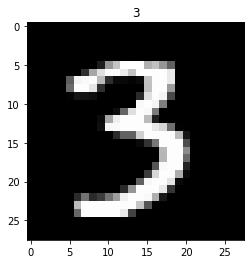

In [10]:
#Visualisation
# Plot one train data
import matplotlib.pyplot as plt
i=10000
plt.imshow(train_data.data[i], cmap='gray')
plt.title('%i' % train_data.targets[i])
plt.show()

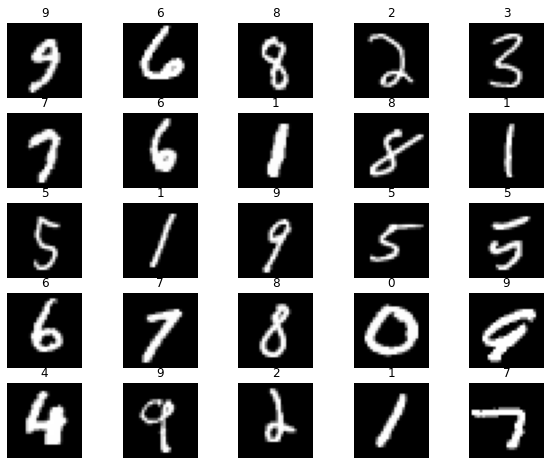

In [14]:
#Plot multiple
figure = plt.figure(figsize=(10, 8))
cols, rows = 5, 5
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_data), size=(1,)).item()
    img, label = train_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

## Preparing data for training with DataLoaders

The Dataset retrieves our dataset’s features and labels one sample at a time. While training a model, we typically want to pass samples in “minibatches”, reshuffle the data at every epoch to reduce model overfitting, and use Python’s multiprocessing to speed up data retrieval.

In [15]:
from torch.utils.data import DataLoader
loaders = {
    'train' : torch.utils.data.DataLoader(train_data, 
                                          batch_size=100, 
                                          shuffle=True, 
                                          num_workers=1),
    
    'test'  : torch.utils.data.DataLoader(test_data, 
                                          batch_size=100, 
                                          shuffle=True, 
                                          num_workers=1),
}
loaders

{'train': <torch.utils.data.dataloader.DataLoader at 0x1f420fc8970>,
 'test': <torch.utils.data.dataloader.DataLoader at 0x1f4203448e0>}

In [16]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

## Define network

In [17]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()

        self.hidden1 = nn.Linear(28*28,512)
        self.relu = nn.ReLU()
        self.hidden2 = nn.Linear(512,10)
        self.softmax = nn.Softmax()
        
# [batch_size, 28, 28]
    def forward(self, x):
        x = x.view(x.size(0), -1)  # flatten the input (batch_size, 28* 28)
        x = self.hidden1(x)
        x = self.relu(x)
        x = self.hidden2(x)
        x = self.softmax(x)
        return x

model = Net()
print(model)

Net(
  (hidden1): Linear(in_features=784, out_features=512, bias=True)
  (relu): ReLU()
  (hidden2): Linear(in_features=512, out_features=10, bias=True)
  (softmax): Softmax(dim=None)
)


In [18]:
learning_rate = 0.01

optimizer = optim.Adam(model.parameters(), lr = learning_rate)   
optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    eps: 1e-08
    foreach: None
    lr: 0.01
    maximize: False
    weight_decay: 0
)

In [19]:
loss_func = nn.NLLLoss()   
loss_func

NLLLoss()

## Training loop

In [20]:
from torch.autograd import Variable
num_epochs = 10

def train(num_epochs, model, loaders):
    
    model.train()
        
    # Train the model
    total_step = len(loaders['train'])
        
    for epoch in range(num_epochs):
        for i, (images, labels) in enumerate(loaders['train']):
            
            # gives batch data, normalize x when iterate train_loader
            b_x = Variable(images)   # batch x
            b_y = Variable(labels)   # batch y
            output = model(b_x)#[0]    
            
            #print(b_x.shape)
            #print(output.shape)
            #print(b_y.shape)
            loss = loss_func(output, b_y)
            
            # clear gradients for this training step   
            optimizer.zero_grad()           
            
            # backpropagation, compute gradients 
            loss.backward()                # apply gradients             
            optimizer.step()                
            
            if (i+1) % 100 == 0:
                print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                       .format(epoch + 1, num_epochs, i + 1, total_step, loss.item()))               
        
    
    
train(num_epochs, model, loaders)

C:\Users\burro\AppData\Local\Temp\ipykernel_2584\2910859498.py:16: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = self.softmax(x)


Epoch [1/10], Step [100/600], Loss: -0.8520
Epoch [1/10], Step [200/600], Loss: -0.8677
Epoch [1/10], Step [300/600], Loss: -0.9119
Epoch [1/10], Step [400/600], Loss: -0.8646
Epoch [1/10], Step [500/600], Loss: -0.8828
Epoch [1/10], Step [600/600], Loss: -0.9123
Epoch [2/10], Step [100/600], Loss: -0.9400
Epoch [2/10], Step [200/600], Loss: -0.9557
Epoch [2/10], Step [300/600], Loss: -0.9600
Epoch [2/10], Step [400/600], Loss: -0.9370
Epoch [2/10], Step [500/600], Loss: -0.9586
Epoch [2/10], Step [600/600], Loss: -0.9100
Epoch [3/10], Step [100/600], Loss: -0.9206
Epoch [3/10], Step [200/600], Loss: -0.9495
Epoch [3/10], Step [300/600], Loss: -0.8566
Epoch [3/10], Step [400/600], Loss: -0.8994
Epoch [3/10], Step [500/600], Loss: -0.9521
Epoch [3/10], Step [600/600], Loss: -0.9407
Epoch [4/10], Step [100/600], Loss: -0.9400
Epoch [4/10], Step [200/600], Loss: -0.9548
Epoch [4/10], Step [300/600], Loss: -0.9226
Epoch [4/10], Step [400/600], Loss: -0.9300
Epoch [4/10], Step [500/600], Lo

In [27]:
def test():
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in loaders['test']:
            output = model(data)
            test_loss += F.nll_loss(output, target, size_average=False).item()
            pred = output.data.max(1, keepdim=True)[1]
            correct += pred.eq(target.data.view_as(pred)).sum()
        test_loss /= len(loaders['test'].dataset)
        print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
          test_loss, correct, len(loaders['test'].dataset),
          100. * correct / len(loaders['test'].dataset)))
test()

C:\Users\burro\AppData\Local\Temp\ipykernel_2584\2910859498.py:16: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = self.softmax(x)



Test set: Avg. loss: -0.9437, Accuracy: 9438/10000 (94%)



C:\Users\burro\AppData\Local\Temp\ipykernel_2584\2910859498.py:16: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = self.softmax(x)


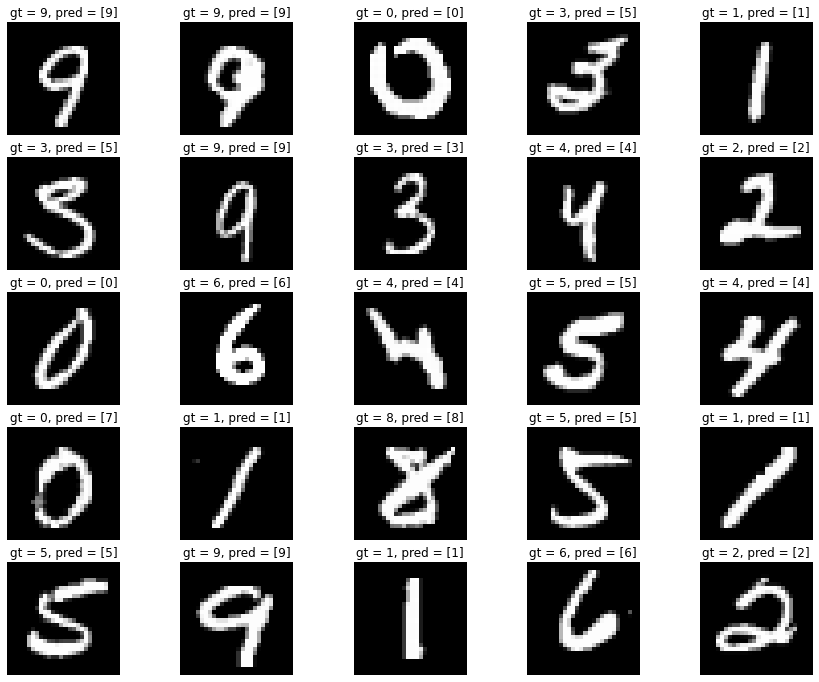

In [29]:
#Plot multiple
figure = plt.figure(figsize=(15, 12))
cols, rows = 5, 5
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(test_data), size=(1,)).item()
    img, label = test_data[sample_idx]
    output = model(img)
    pred_y = torch.max(output,1)
    pred_label = pred_y[1].numpy()
    figure.add_subplot(rows, cols, i)
    plt.title('gt = ' + str(label) + ', pred = ' + str(pred_label))
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

## Convolutional Neural Networks
Convolutional neural networks are particular types of FNN -- introduced in [this paper](http://yann.lecun.com/exdb/publis/pdf/lecun-89e.pdf) by Yann LeCun-- that takes into account the structure/topology of their inputs in the processing.

They tackle the following points that are ignored in standard FNNs.

- **Dealing with very high-dimensional inputs.** For instance, given an RGB image of size $ 200 \times 200 \times 3$, the weights matrix between the input and the first hidden layer, of dimension $h_1$, is of size $120000 \times h_1$. As a result, not only will the number of parameters explode, but the computation will also be time-consuming.
- **Exploiting the input topology (spatial structure)**, $2D$ or $3D$ images. As shown in the dictionary learning section, images can be written as linear combination of patterns. Accordingly, instead of have a large weight matrix, it may be better to have small ones that look for certain patterns.
- **Building invariance to certain variations**, e.g. translation, illumination, etc. In an image classification task, the output should be remain the same, to extent, after small transformation on the input.

To do so, the CNNs incorporate the following techniques.

- **Local connectivity**: It removes the cumbersome and time-consuming fully connection between two
 layers by local connection. That is, each layer is divided into \\textit{feature maps} and the weights
 are applied on local regions of the input called receptive fields of .
- **Parameter sharing**: Going further, all neurons of a feature map are forced to share
 the same weights. Consequently, in a feature map, the neurons look for the same pattern but at 
 different locations in the input. The $i$-th feature map of the $l$-layer can, therefore, be seen as the result of 
 a **cross-correlation** operation between its weights $\mathbf{W}_l^i$ and its input $\mathbf{z}_l$. 
By language abuse, this operation is called convolution thus the name **convolutional neural networks**.
- **Pooling/sub-sampling**: This point aims at reducing the dimension of a layer by aggregating
its feature maps structurally. Also, the aggregation can be done so as to make the output invariant
to small translation by taking the maximum in a sliding-window manner

<p align="center">
<img src="conv_pool_illust.png" width="450" title="Fully Convolutional Neural Network Example." >
</p>

Strongly recommend [Stanford's CS231n CNN Tutorial](https://cs231n.github.io/convolutional-networks/) for reading.

<p align="center">
<img src="fcn.png" width="1000" title="Fully Convolutional Neural Network Example." >
</p>

### Define network:

In [30]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
# Input to conv1 will be image of shape [batch_size,1,28,28] (height and width are 28 for this example)
        self.conv1 = nn.Sequential(   
            nn.Conv2d(in_channels=1,out_channels=10,kernel_size=(3,3),padding=1), #output of this conv is of shape [BS,10,28,28]
            nn.ReLU(), 
            nn.MaxPool2d(kernel_size=(2,2)) #output of this is [BS,10,14,14]
        )
        self.conv2 = nn.Sequential( 
            nn.Conv2d(in_channels=10,out_channels=20,kernel_size=(3,3),padding=1), #output of this is [BS,20,14,14]
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2,2)) # output of this is [BS,20,7,7]
        )
        self.conv3 = nn.Sequential(
            nn.Conv2d(in_channels=20,out_channels=30,kernel_size=(3,3),padding=1), #Output of this [BS,30,7,7]
            nn.ReLU(),
            nn.Conv2d(in_channels=30,out_channels=30,kernel_size=(3,3),padding=1),
            nn.ReLU()
        )
        self.conv4 = nn.Sequential(
            nn.Conv2d(in_channels=30,out_channels=20,kernel_size=(3,3),padding=1),
            nn.ReLU(),
            nn.Upsample(scale_factor=2))
        
        self.conv5 = nn.Sequential(
            nn.Conv2d(in_channels=20,out_channels=10,kernel_size=(3,3),padding=1),
            nn.ReLU(),
            nn.Upsample(scale_factor=2)) #[BS,10,28,28]
        
        
        self.conv6 = nn.Sequential(
            nn.Conv2d(in_channels=10,out_channels=1,kernel_size=(1,1)),
            nn.Sigmoid()
        )
            

    def forward(self, x,plot=False):

        x1 = self.conv1(x)
        x2 = self.conv2(x1)
        x3 = self.conv3(x2)
        x4 = self.conv4(x3)
        x5 = self.conv5(x4)
        x6 = self.conv6(x5)
        
        if plot:
            print('Input shape', x.shape)
            print('After layer 1', x1.shape)
            print('After layer 2', x2.shape)
            print('After layer 3', x3.shape)
            print('After layer 4', x4.shape)
            print('After layer 5', x5.shape)
            print('After layer 6', x6.shape)

        return x6

model = CNN()
print(model)


CNN(
  (conv1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(10, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  )
  (conv3): Sequential(
    (0): Conv2d(20, 30, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(30, 30, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
  )
  (conv4): Sequential(
    (0): Conv2d(30, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Upsample(scale_factor=2.0, mode=nearest)
  )
  (conv5): Sequential(
    (0): Conv2d(20, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Upsample(scale_factor=2.0, mode=nearest)
  )
  (conv6): Sequential(
    

In [31]:
#Look at layers
im,label = train_data[0]
im = im.unsqueeze(1)
print(im.shape)

output = model(im,plot=True)

torch.Size([1, 1, 28, 28])
Input shape torch.Size([1, 1, 28, 28])
After layer 1 torch.Size([1, 10, 14, 14])
After layer 2 torch.Size([1, 20, 7, 7])
After layer 3 torch.Size([1, 30, 7, 7])
After layer 4 torch.Size([1, 20, 14, 14])
After layer 5 torch.Size([1, 10, 28, 28])
After layer 6 torch.Size([1, 1, 28, 28])


## Homework:

### Run an image classification model in the CIFAR10 dataset:
You will need to:
- Load the data, and load into dataloaders
- Define a network (see end)
- Define an optimizer (recommened [Stochastic Gradient Descent](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html) with lr = 0.01)
- Define loss function (reccommend [CrossEntropyLoss](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html) (note, a softmax function should not be used in the final layer of the network when using CrossEntropy))
- Run a training loop
- Write some code which print a montage of images, with the title on each subplot as the ground truth label and the predicted label

Some remarks:
- The images in CIFAR10 are RGB images, and are therefore of shape $(32,32,3)$, unlike MNIST which were greyscale and of shape $(28,28)$.
- Pytorch requires inputs to a convolutional layer to be of shape (BatchSize,Channels,Height,Width). When using dataloaders this is done automatically, and so during your training loop you won't need to worry about this. However, if defining your own function (for example for plotting the output of the model), executing: "img, label = train_data[0]" will error as img is of shape (3,32,32), and not (1,3,32,32) -- (as you are essentially passing a batch of 1 when predicting a single image.
- A similar problem here is when plotting the image. matplotlib expects your image to be of shape (32,32,3) (i.e. the channels to be the final dim). To transpose an image from shape (3,32,32) to (32,32,3), use the np.transpose function as in: img = img.np.transpose(img,[1,2,0])
## Network:
You can in principle define your own architecture, but I recommend making a simple network according to the following pseduocode
* Conv2D (with filters 6, padding = 1) (remark: in_channels will be 3 here as RGB image!)
* ReLU, MaxPool
* Conv2D (with filters 16, padding = 1) 
* ReLU, MaxPool
* Flatten
* FullyConnectedLayer, 120 (has input 8x8x16)
* FullyConnectedLayer, 84
* FullyConnectedLayer, 10

As we aren't using softmax, the predicted class of the network will be the entry with the maximum value.

### This network contains a relatively low number of parameters. This is so it will train in a reasonable amount of time on your machine. As a result, your network accuracy will not be amazing. Do not worry about this.


In [8]:
from torchvision import datasets
from torchvision.transforms import ToTensor

train_data = datasets.CIFAR10(root='data', 
                            train=True,
                            transform=ToTensor())
test_data = datasets.CIFAR10(
    root = 'data', 
    train = False, 
    transform = ToTensor()
)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [9]:
import torch
from torch.utils.data import DataLoader
loaders = {
    'train' : torch.utils.data.DataLoader(train_data, 
                                          batch_size=100, 
                                          shuffle=True, 
                                          num_workers=1),
    
    'test'  : torch.utils.data.DataLoader(test_data, 
                                          batch_size=100, 
                                          shuffle=True, 
                                          num_workers=1),
}
loaders

{'train': <torch.utils.data.dataloader.DataLoader at 0x293b82e9550>,
 'test': <torch.utils.data.dataloader.DataLoader at 0x293b82e9340>}

image shape: torch.Size([3, 32, 32])
image shape: torch.Size([32, 32, 3])
label is 1
corresponding class is: car


Text(0.5, 1.0, 'car')

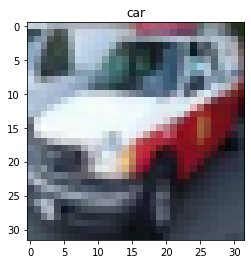

In [12]:
import numpy as np
import matplotlib.pyplot as plt
# Plot an image with the class

i=60# change index
im, label = train_data[i]
print('image shape:' , im.shape) 
im = np.transpose(im, [1,2,0])
print('image shape:' , im.shape) 
print('label is', label)
print('corresponding class is:', classes[label])
plt.imshow(im)
plt.title(classes[train_data.targets[i]])

In [ ]:
# Define network, loss function, optimizer, and write training loop. Finally plot a montage of results